# Confidence Intervals

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import binom
from scipy import optimize

In our article, for the sake of conciseness, we do not give the confidence interval for each number in the body of the article and in the tables.

The following function computes the exact confidence interval for a repeated Bernouilli, with *k* successes out of *n* independent samples. The parameter *confidence* specifies the desired level of confidence, e.g. 95%. This function is adapted from https://github.com/KazKobara/ebcic.

In [2]:
def exact_confidence_interval(n, k, confidence):
    """Return exact Binomial confidence interval for the parameter.

    Returns:
            lower_p (float): lower bound of Binomial confidence interval.
            upper_p (float): upper bound of Binomial confidence interval.
    """
    alpha = 1 - confidence
    r = alpha / 2
    if k > n / 2:
        # Cumulative error becomes large for k >> n/2,
        # so make k < n/2.
        k = n - k
        reverse_mode = True
    else:
        reverse_mode = False

    def upper(p):
        """
        Upper bound is the p making the following 0.
        """
        return binom.cdf(k, n, p) - r

    def lower(p):
        """
        Lower bound for k>0 is the p making the following 0.
        """
        return binom.cdf(n - k, n, 1 - p) - r

    if k == 0:
        lower_p = 0.0
        upper_p = 1 - (alpha)**(1 / n)
    else:
        # 0 < k <= n/2
        u_init = k / n
        l_init = k / n
        if k == 1:
            l_init = 0
        elif k == 2:
            l_init = k / (2 * n)
        lower_p = optimize.fsolve(lower, l_init)[0]
        if n == 2 and k == 1:
            # Exception of k/n = 1/2 and n is too small.
            upper_p = 1 - lower_p
        else:
            upper_p = optimize.fsolve(upper, u_init)[0]

    if reverse_mode:
        lower_p, upper_p = 1 - upper_p, 1 - lower_p

    return lower_p, upper_p

For 10,000 samples, we draw the 95% confidence interval for each possible value of the number of successes *k*:

In [3]:
N_SAMPLES = 10000
ks = np.array(range(N_SAMPLES + 1))
lowers = []
uppers = []
averages = []
for k in ks:
    lower, upper = exact_confidence_interval(n=N_SAMPLES, k=k, confidence=0.95)
    lowers.append(lower)
    uppers.append(upper)
    averages.append(k / N_SAMPLES)

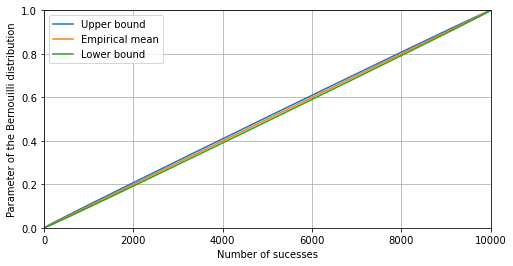

In [4]:
plt.subplots(figsize=(8, 4))
plt.plot(ks, uppers, label='Upper bound')
plt.plot(ks, averages, label='Empirical mean')
plt.plot(ks, lowers, label='Lower bound')
plt.xlabel('Number of sucesses')
plt.ylabel('Parameter of the Bernouilli distribution')
plt.xlim(0, 10000)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

Some examples:

In [5]:
df = pd.DataFrame()
df.index.name = 'k'
for k in list(range(10)) + list(range(10, 100, 10)) + list(range(100, 600, 100)):
    df.loc[k, 'Lower bound'] = lowers[k]
    df.loc[k, 'Empirical mean'] = averages[k]
    df.loc[k, 'Upper bound'] = uppers[k]
df

,Lower bound,Empirical mean,Upper bound
k,,,
0,0.000000,0.0000,0.000300
1,0.000003,0.0001,0.000557
2,0.000024,0.0002,0.000722
3,0.000062,0.0003,0.000876
4,0.000109,0.0004,0.001024
5,0.000162,0.0005,0.001166
6,0.000220,0.0006,0.001305
7,0.000281,0.0007,0.001442
8,0.000345,0.0008,0.001576
